# Guided Project: Predicting Listing Gains in the Indian IPO Market

An investment firm is interested in investing in the Initial Public Offerings (IPO) in the Indian market. This project aims to determine if there will be listing gains for the IPO by building a deep learning classification model. Listing gains are defined as percentage price increase from issue price on listing day.

Data is taken from moneycontrol and consists of information on Indian IPOs from 2010 to 2022.

Data description:

Date: date when the IPO was listed

IPOName: name of the IPO

Issue_Size: size of the IPO issue, in INR Crores

Subscription_QIB: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

Subscription_HNI: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

Subscription_RII: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

Subscription_Total: total number of times the IPO was subscribed overall

Issue_Price: the price in INR at which the IPO was issued

Listing_Gains_Percent: is the percentage gain in the listing price over the issue price




## Data Exploration

First step is to download all necessary libraries and to explore the data.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [6]:
ipos = pd.read_csv("Indian_IPO_Market_Data.csv")

In [3]:
print(ipos.head())

      Date           IPOName  Issue_Size  Subscription_QIB  Subscription_HNI  \
0  03/02/10    Infinite Comp      189.80             48.44            106.02   
1  08/02/10    Jubilant Food      328.70             59.39             51.95   
2  15/02/10    Syncom Health       56.25              0.99             16.60   
3  15/02/10  Vascon Engineer      199.80              1.12              3.65   
4  19/02/10      Thangamayil        0.00              0.52              1.52   

   Subscription_RII  Subscription_Total  Issue_Price  Listing_Gains_Percent  
0             11.08               43.22          165                  11.82  
1              3.79               31.11          145                 -84.21  
2              6.25                5.17           75                  17.13  
3              0.62                1.22          165                 -11.28  
4              2.26                1.12           75                  -5.20  


In [4]:
print(ipos.shape)

(319, 9)


In [5]:
print(ipos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB
None


In [6]:
print(ipos["Listing_Gains_Percent"].describe())

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64


In [7]:
print(ipos.describe(include= "all"))

           Date           IPOName    Issue_Size  Subscription_QIB  \
count        319              319    319.000000        319.000000   
unique       287              319           NaN               NaN   
top     16/08/21  Apollo Micro Sy           NaN               NaN   
freq           4                1           NaN               NaN   
mean         NaN              NaN   1192.859969         25.684138   
std          NaN              NaN   2384.643786         40.716782   
min          NaN              NaN      0.000000          0.000000   
25%          NaN              NaN    169.005000          1.150000   
50%          NaN              NaN    496.250000          4.940000   
75%          NaN              NaN   1100.000000         34.635000   
max          NaN              NaN  21000.000000        215.450000   

        Subscription_HNI  Subscription_RII  Subscription_Total  Issue_Price  \
count         319.000000        319.000000          319.000000   319.000000   
unique       

Creating a binary variable which is equal to 1 when there are listing gains and 0 othervise

In [7]:
ipos["Listing_Gains_Profit"] = 0
ipos["Listing_Gains_Profit"][ipos["Listing_Gains_Percent"]>0] =1

<ipython-input-7-2bb67bcdd412>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipos["Listing_Gains_Profit"][ipos["Listing_Gains_Percent"]>0] =1


Checking if there are any NA values in the dataset

In [9]:
print(ipos.isnull().sum())

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64


## Data Visualisation

The next step is to visualise the data to get a better understanding of the variables 

In [8]:
print(ipos["Listing_Gains_Profit"].value_counts())

1    174
0    145
Name: Listing_Gains_Profit, dtype: int64


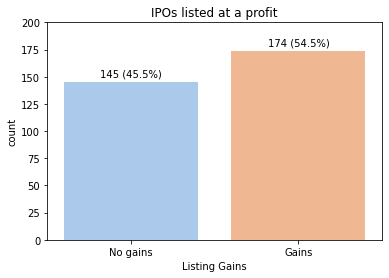

In [9]:
sns.countplot(data = ipos, x = "Listing_Gains_Profit", palette="pastel")
plt.title("IPOs listed at a profit")
plt.xlabel("Listing Gains")
new_labels = ["No gains", "Gains"]
plt.xticks(ticks=plt.gca().get_xticks(), labels=new_labels)
ax = plt.gca()
ax.set_ylim(top=200)
counts = ipos['Listing_Gains_Profit'].value_counts()
total = len(ipos)
for p in plt.gca().patches:
    height = p.get_height()  # Height of the bar
    percentage = f"{height / total * 100:.1f}%"  # Calculate percentage
    plt.text(
        p.get_x() + p.get_width() / 2,  # X-coordinate
        height + 3,  # Y-coordinate slightly above the bar
        f'{height} ({percentage})',  # Label with absolute and percentage
        ha="center",  # Center the text
        va="bottom"
    )
plt.show()

From the graph above it can bee seen that there are slightly more IPOs that were listed at a profit than those that were not at a profit

In [10]:
cont_var = ["Issue_Size", "Subscription_QIB", "Subscription_HNI", "Subscription_RII", "Subscription_Total", "Issue_Price"]

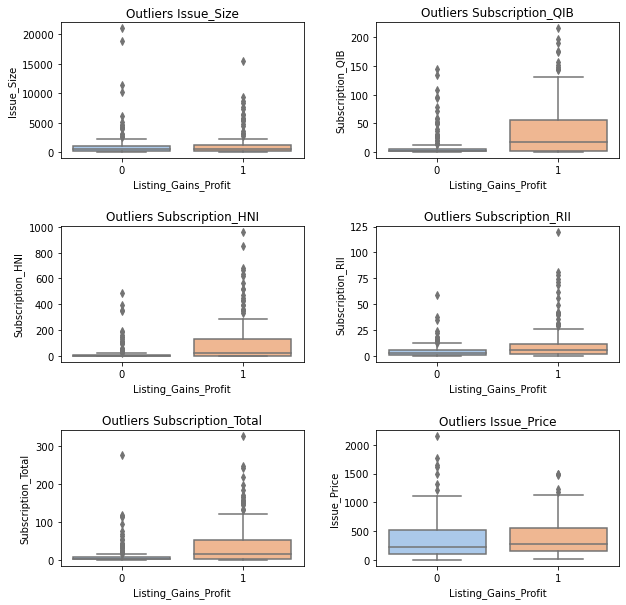

In [11]:
fig, ax = plt.subplots(6, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for i, var in enumerate(cont_var, start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=ipos, y=var, x="Listing_Gains_Profit", palette="pastel")
    plt.title(f'Outliers {var}')
plt.show()

There are some outliers present in continues variables. At the Data Preparation stage this issue will be adressed.

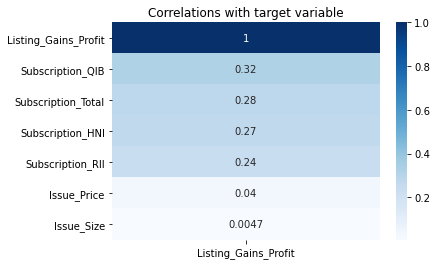

In [12]:
corr_w_target = ipos[["Issue_Size", "Subscription_QIB", "Subscription_HNI", "Subscription_RII", "Subscription_Total", "Issue_Price", "Listing_Gains_Profit"]].corr()
sns.heatmap(corr_w_target[["Listing_Gains_Profit"]].sort_values(by="Listing_Gains_Profit", ascending=False), annot=True, cmap="Blues")
plt.title("Correlations with target variable")
plt.show()

Correlations between the target variable and explanatory variables are lower than 0.35 for all of the variables

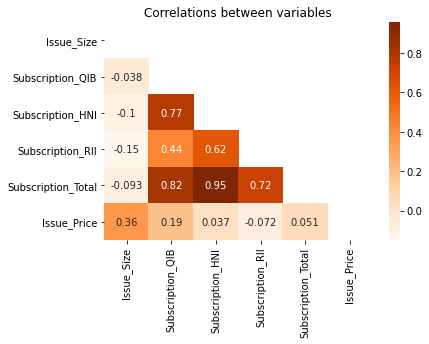

In [13]:
correlations = ipos[cont_var].corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, cmap = "Oranges", annot=True)
plt.title("Correlations between variables")
plt.show()

## Data preparation

Removing irrelevant variables and dealing with outliers

In [14]:
print(ipos.describe(include= "all"))

           Date    IPOName    Issue_Size  Subscription_QIB  Subscription_HNI  \
count        319       319    319.000000        319.000000        319.000000   
unique       287       319           NaN               NaN               NaN   
top     16/08/21  Sona BLW           NaN               NaN               NaN   
freq           4         1           NaN               NaN               NaN   
mean         NaN       NaN   1192.859969         25.684138         70.091379   
std          NaN       NaN   2384.643786         40.716782        142.454416   
min          NaN       NaN      0.000000          0.000000          0.000000   
25%          NaN       NaN    169.005000          1.150000          1.255000   
50%          NaN       NaN    496.250000          4.940000          5.070000   
75%          NaN       NaN   1100.000000         34.635000         62.095000   
max          NaN       NaN  21000.000000        215.450000        958.070000   

        Subscription_RII  Subscription_

In [15]:
ipos_modif = ipos.drop(columns=["IPOName", "Date ", "Listing_Gains_Percent"], axis=1)

In [16]:
print(ipos_modif.describe(include= "all"))

         Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count    319.000000        319.000000        319.000000        319.000000   
mean    1192.859969         25.684138         70.091379          8.561599   
std     2384.643786         40.716782        142.454416         14.508670   
min        0.000000          0.000000          0.000000          0.000000   
25%      169.005000          1.150000          1.255000          1.275000   
50%      496.250000          4.940000          5.070000          3.420000   
75%     1100.000000         34.635000         62.095000          8.605000   
max    21000.000000        215.450000        958.070000        119.440000   

       Subscription_Total  Issue_Price  Listing_Gains_Profit  
count          319.000000   319.000000            319.000000  
mean            27.447147   375.128527              0.545455  
std             48.772203   353.897614              0.498712  
min              0.000000     0.000000              0.

In [17]:
for i in ipos_modif.columns:
    print(ipos_modif[i].skew())

4.853401606434454
2.143704625584823
3.0784448213212667
3.7082740836630137
2.9119071381074786
1.6968814842159945
-0.18343787550316024


When the skewness value lies between -1 and +1, it means that there are no significant outliers. The above result shows that most of the variables have outliers. Outliers can be removed using IQR Value (interquartile range value)

In [18]:
outliers = ipos_modif.columns.drop("Listing_Gains_Profit")
print(outliers)

Index(['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price'],
      dtype='object')


In [19]:
for i in outliers:
    q1 = ipos_modif[i].quantile(q=0.25)
    q3 = ipos_modif[i].quantile(q=0.75)  
    iqr = q3 - q1   
    lower = (q1 - 1.5 * iqr) 
    upper = (q3 + 1.5 * iqr)
    ipos_modif[i] = np.where(ipos_modif[i]>upper, upper, ipos_modif[i])
    ipos_modif[i] = np.where(ipos_modif[i]<lower, lower, ipos_modif[i])

In [20]:
for i in ipos_modif.columns:
    print(ipos_modif[i].skew())

1.2246204359225623
1.262734274613526
1.1816363175334872
1.12917087322117
1.2938804195699385
1.0847224584503858
-0.18343787550316024


Now all the skewness values are very close to 1, thus no more significant outliers

In [21]:
target = ["Listing_Gains_Profit"] 
predictors = list(set(list(ipos_modif.columns)) - set(target))

Normalising predictors.

In [22]:
ipos_modif[predictors] = ipos_modif[predictors] / ipos_modif[predictors].max()

In [23]:
print(ipos_modif.describe(include= "all"))

       Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count  319.000000        319.000000        319.000000        319.000000   
mean     0.305854          0.253601          0.263157          0.309232   
std      0.308308          0.342961          0.374477          0.315147   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.067697          0.013551          0.008184          0.065051   
50%      0.198779          0.058212          0.033061          0.174490   
75%      0.440618          0.408131          0.404910          0.439031   
max      1.000000          1.000000          1.000000          1.000000   

       Subscription_Total  Issue_Price  Listing_Gains_Profit  
count          319.000000   319.000000            319.000000  
mean             0.252489     0.311793              0.545455  
std              0.335939     0.268853              0.498712  
min              0.000000     0.000000              0.000000  
25%      

Seperating data into dependent and explanatory variables.

In [24]:
X = ipos_modif[predictors].values
y = ipos_modif[target].values

Splitting the data into test and train sets. Test set size is 20%.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=135)

Check that the data is divided properly and each subset has enough categorical variability for the target variable.

In [26]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 113, 1: 142}

In [27]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 32, 1: 32}

In [28]:
print(X_train.shape); print(X_test.shape)

(255, 6)
(64, 6)


## Building and Training Models

The first model is the shallow model with only input and output layers.

In [47]:
model_sh = tf.keras.Sequential()
model_sh.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = "elu"))
model_sh.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model_sh.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                224       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


The second model is a deep model with 3 hidden layers.

In [48]:
model_dp = tf.keras.Sequential()
model_dp.add(tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='elu'))
model_dp.add(tf.keras.layers.Dense(16, activation='elu'))
model_dp.add(tf.keras.layers.Dense(8, activation='elu'))
model_dp.add(tf.keras.layers.Dense(4, activation='elu'))
model_dp.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model_dp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                224       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


Using optimiser to enhance performance and minimise errors.

In [49]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.01)

In [50]:
model_sh.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
model_sh.fit(X_train, y_train, epochs = 15, verbose = 0)
print(model_sh.evaluate(X_train, y_train))
print(model_sh.evaluate(X_test, y_test))

8/8 [==============================] - 0s 873us/step - loss: 0.6067 - accuracy: 0.6588
[0.6067442893981934, 0.658823549747467]
2/2 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6875
[0.625015139579773, 0.6875]


In [51]:
model_dp.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
model_dp.fit(X_train, y_train, epochs = 15, verbose = 0)
print(model_dp.evaluate(X_train, y_train))
print(model_dp.evaluate(X_test, y_test))

8/8 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6667
[0.6041803956031799, 0.6666666865348816]
2/2 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6719
[0.6213473081588745, 0.671875]


In [ ]:
train_pred_sh = model_sh.predict(X_train)
test_pred_sh = model_sh.predict(X_test)

2/2 [==============================] - 0s 988us/step
0.13763644989374035


In [ ]:
train_pred_dp = model_dp.predict(X_train)
test_pred_dp = model_dp.predict(X_test)

2/2 [==============================] - 0s 2ms/step


## Results

In [54]:
test_pred_sh = np.round(test_pred_sh, 0)
test_pred_sh = test_pred_sh.astype("int64")
print(test_pred_sh.dtype)
print(y_test.dtype)


int64
int64


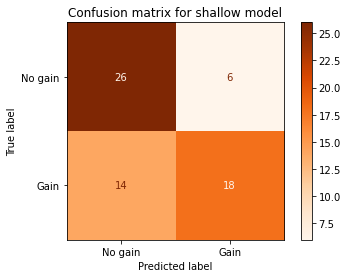

In [55]:
conf_matrix_sh = confusion_matrix(y_test, test_pred_sh)
cm_plot_sh = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_sh, display_labels = ["No gain", "Gain"])
cm_plot_sh.plot(cmap="Oranges")
plt.title("Confusion matrix for shallow model")
plt.show()

In [56]:
test_pred_dp = np.round(test_pred_dp, 0)
test_pred_dp = test_pred_dp.astype("int64")
print(test_pred_dp.dtype)
print(y_test.dtype)


int64
int64


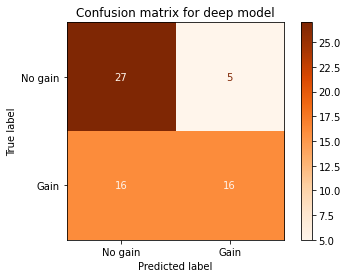

In [57]:
conf_matrix_dp = confusion_matrix(y_test, test_pred_dp)
cm_plot_dp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_dp, display_labels = ["No gain", "Gain"])
cm_plot_dp.plot(cmap="Oranges")
plt.title("Confusion matrix for deep model")
plt.show()

Confusion matrix for both models showed that they performed similarly. One of the possible reasons for that could be small sample size of the dataset. It could be possible to improve the results of the deep model using hyperparameters tuning. 

Around two thirds of the predictions for both models were correct. Considering the nature of the question, investors are more interested to see which IPOs would be listed at a profit. For 32 IPOs that were listed at profit, only half were classified as "Gain" by the deep model, while shallow model classified only 44% incorrectly.

In [58]:
print(accuracy_score(y_test, test_pred_sh))
print(accuracy_score(y_test, test_pred_dp))

0.6875
0.671875


Not surprisingly, accuracy scores are also similar for both models being more than 67%, with shallow model being slightly more accurate.

In [60]:
print(precision_score(y_test, test_pred_sh))
print(precision_score(y_test, test_pred_dp))
print(recall_score(y_test, test_pred_sh))
print(recall_score(y_test, test_pred_dp))

0.75
0.7619047619047619
0.5625
0.5


Two other metrics that can be used to access the model are precision and recall. 

Precision measures how often positive predictions of the model are correct. Thus, in this case it shows how often when the model predicted gains it was incorrect. For both models the precision is at least 75%, with deep model having a slightly higher score. 

Recall measures how often the model identifies positive instances correctly, compared to all the positive instances in the sample. For both models it is around 50%, with shallow model performing a bit better. 

## Conclusion

Overall, both models showed similar results with accuracy scores over 67%, precision over 75% and recall over 50%. Surprisingly, shallow model showed slightly better results in two out of three metrics used. One of the possible reasons for that could be the fact that the sample size is relatively small. Increasing sample size or introducing hyperparameters tuning might result in improvement for the deep model.

In order to fully access the performance of the models, we need to also consider the nature of the problem. As investors, we are more interested in gains, thus the classes in the classification might not have the same weight for us. When looking at recall scores, it can be concluded that around 50% of gains were missed, as half of predictions for IPOs which were issued at a profit, were wrongly classified as "No gains". On the other hand, just around 25% of IPOs that had no gains were wrongly classified as "Gains". Shallow model showed a better recall score, while deep model showed a better precision value.